records :  200
features :  5
Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
(200,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000 

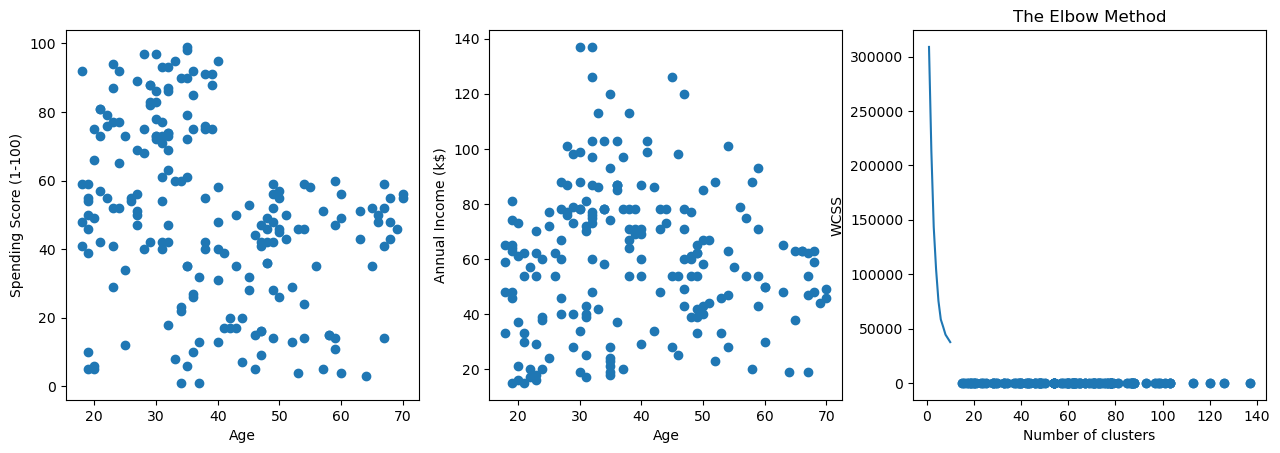

No. of data objects in each cluster
Centroids of the clusters assigned
Sum of Squared Error (sse) = 75427.71182424155


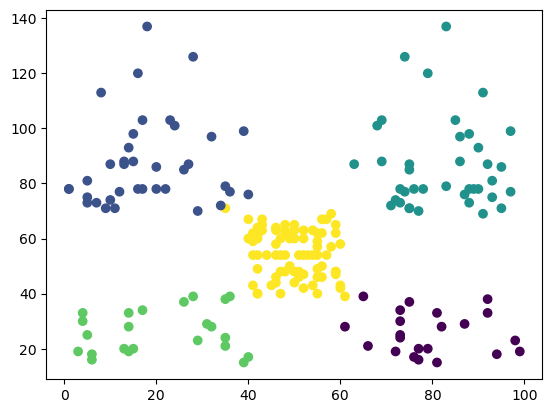

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("C:\\Trash\\Mall_Customers.csv")

x = df.iloc[:,:-1]

y = df.iloc[:,-1]

print("records : ",df.shape[0])
print("features : ",df.shape[1])

print(df.columns)

print(y.shape)

print(df.info())

print(df.describe())

print(df.isnull().sum())

gender = pd.get_dummies(df['Genre'], drop_first = True)

df_customers = pd.concat([df, gender], axis = 1)

df_customers = df_customers.drop(['Genre', 'CustomerID'], axis=1)

plt.subplots_adjust(right=2.0)
plt.subplot(1,3,1)
plt.scatter(df_customers['Age'], df_customers['Spending Score (1-100)'])
plt.xlabel('Age')

plt.ylabel('Spending Score (1-100)')
plt.subplot(1,3,2)
plt.scatter(df_customers['Age'], df_customers['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.subplot(1,3,3)
plt.scatter(df_customers['Annual Income (k$)'], df_customers['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km.fit(df_customers)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#Fit the model
km = KMeans(n_clusters = 5)
km.fit(df_customers)
df_customers['clusters'] = km.labels_
df_customers.head()
print('No. of data objects in each cluster')
df_customers['clusters'].value_counts()
print('Centroids of the clusters assigned')
km.cluster_centers_

plt.scatter(df_customers['Spending Score (1-100)'], df_customers['Annual Income (k$)'], c = df_customers['clusters'])

sse = km.inertia_
print('Sum of Squared Error (sse) =', sse)